In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [2]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9090909090909091)

In [3]:
model.feature_importances_

array([0.        , 0.02831198, 0.        , 0.00752597, 0.00501731,
       0.        , 0.        , 0.        , 0.01101841, 0.        ,
       0.00243087, 0.00980366, 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.00668975, 0.        ,
       0.03687207, 0.02958161, 0.72534081, 0.        , 0.01823754,
       0.        , 0.        , 0.10516335, 0.        , 0.00401385])

<AxesSubplot:>

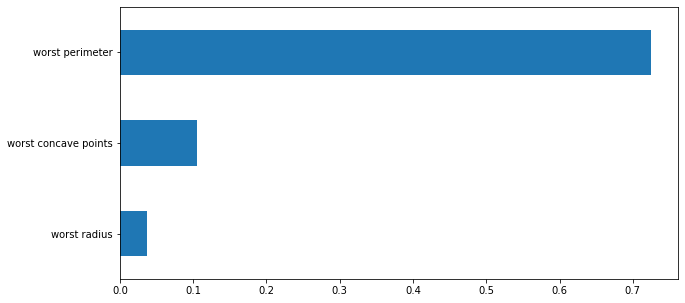

In [4]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=True).tail(3).plot(kind='barh', figsize=(10, 5))

In [5]:
fi[fi!=0].sort_values(ascending=False)

worst perimeter            0.725341
worst concave points       0.105163
worst radius               0.036872
worst texture              0.029582
mean texture               0.028312
worst smoothness           0.018238
mean symmetry              0.011018
area error                 0.009993
texture error              0.009804
mean area                  0.007526
symmetry error             0.006690
mean smoothness            0.005017
worst fractal dimension    0.004014
radius error               0.002431
dtype: float64

In [6]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model3.score(x_train, y_train), model3.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(1.0, 0.9090909090909091)

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(model3,  out_file='model3.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

In [9]:
!pip install graphviz

In [10]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [11]:
export_graphviz(model5,  out_file='model5.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

In [12]:
with open('model5.dot') as f:
    data = f.read()
graphviz.Source(data)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                    boston['target'],
                                                    random_state=0)

In [14]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6761109398814511)

In [15]:
model.feature_importances_

array([3.26844410e-02, 4.51557055e-04, 7.79624755e-03, 3.38366339e-04,
       1.55098744e-02, 2.42694414e-01, 5.81055679e-03, 4.95995863e-02,
       4.87012516e-03, 1.29964008e-02, 3.11457518e-02, 1.00707553e-02,
       5.86031924e-01])

<AxesSubplot:>

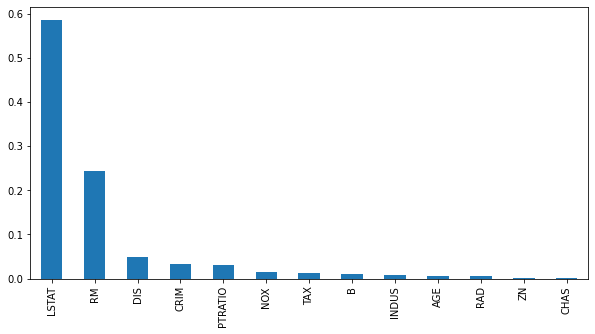

In [16]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [17]:
fi[fi!=0].sort_values(ascending=False)

LSTAT      0.586032
RM         0.242694
DIS        0.049600
CRIM       0.032684
PTRATIO    0.031146
NOX        0.015510
TAX        0.012996
B          0.010071
INDUS      0.007796
AGE        0.005811
RAD        0.004870
ZN         0.000452
CHAS       0.000338
dtype: float64

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                feature_names=boston['feature_names'],
                impurity=True, filled=True)

In [19]:
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH